In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from ForwardContracts import *

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 200 # number of time snapshots
D = 200 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0] * D)[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = ForwardContracts(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2*10**4
lr = 1e-3

In [8]:
model.load_model("models/Forward200D.pth")

In [5]:
graph = model.iteration, model.training_loss

In [7]:
n_iter = 11*10**2
lr = 1e-6

In [8]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 1.109e+00, Y0: 3.973, Time: 0.23, Learning Rate: 1.000e-06
It: 21000, Loss: 8.748e-01, Y0: 3.964, Time: 21.95, Learning Rate: 1.000e-06
It: 21100, Loss: 1.220e+00, Y0: 3.968, Time: 21.43, Learning Rate: 1.000e-06
It: 21200, Loss: 8.277e-01, Y0: 3.961, Time: 22.48, Learning Rate: 1.000e-06
It: 21300, Loss: 1.027e+00, Y0: 3.962, Time: 22.35, Learning Rate: 1.000e-06
It: 21400, Loss: 1.052e+00, Y0: 3.967, Time: 22.00, Learning Rate: 1.000e-06
It: 21500, Loss: 8.266e-01, Y0: 3.965, Time: 23.73, Learning Rate: 1.000e-06
It: 21600, Loss: 9.043e-01, Y0: 3.964, Time: 23.37, Learning Rate: 1.000e-06
It: 21700, Loss: 8.994e-01, Y0: 3.967, Time: 22.41, Learning Rate: 1.000e-06
It: 21800, Loss: 1.067e+00, Y0: 3.967, Time: 22.36, Learning Rate: 1.000e-06
It: 21900, Loss: 9.435e-01, Y0: 3.967, Time: 22.68, Learning Rate: 1.000e-06
total time: 247.43739914894104 s


In [9]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    if type(t_test_i).__module__ != 'numpy':
        t_test_i = t_test_i.cpu().numpy()
    t_test = np.concatenate((t_test, t_test_i), axis=0)
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)

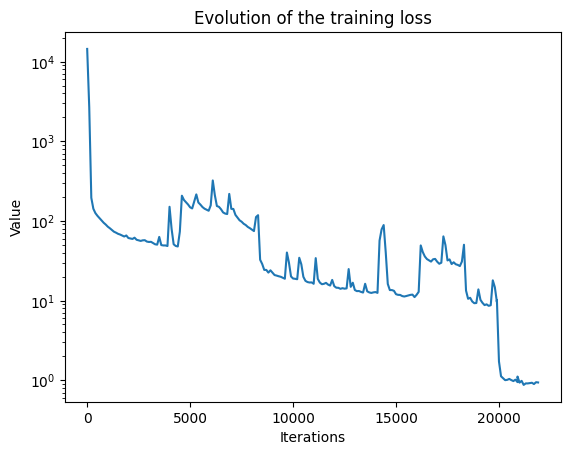

In [10]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.show()

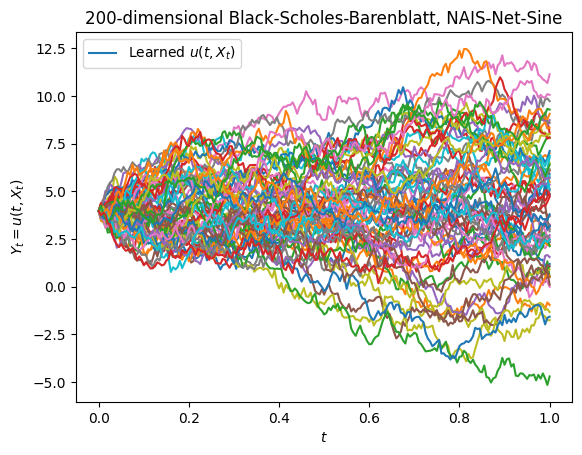

In [11]:
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [12]:
model.save_model("models/Forward200D.pth")